<a href="https://colab.research.google.com/github/HasibAlMuzdadid/Data-Science-Projects/blob/main/page%20view%20time%20series%20visualizer/page_view_time_series_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Page View Time Series Visualizer**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Import data (Make sure to parse dates. Consider setting index column to 'date'.)

In [ ]:
# Import Dataset
df = pd.read_csv("fcc-forum-pageviews.csv")

In [ ]:
# Shape of Dataset
df.shape

(1304, 2)

In [ ]:
df.dtypes

date     object
value     int64
dtype: object

In [ ]:
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [ ]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


In [ ]:
# Parsing date
df["date"] = pd.to_datetime(df["date"])

# Set index to "date"
df = df.set_index("date")

df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [ ]:
# Clean Data
df = df[(df["value"]>=df["value"].quantile(0.025)) & (df["value"]<=df["value"].quantile(0.975))]
df.shape

(1238, 1)

Draw a line chart by using Matplotlib. The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

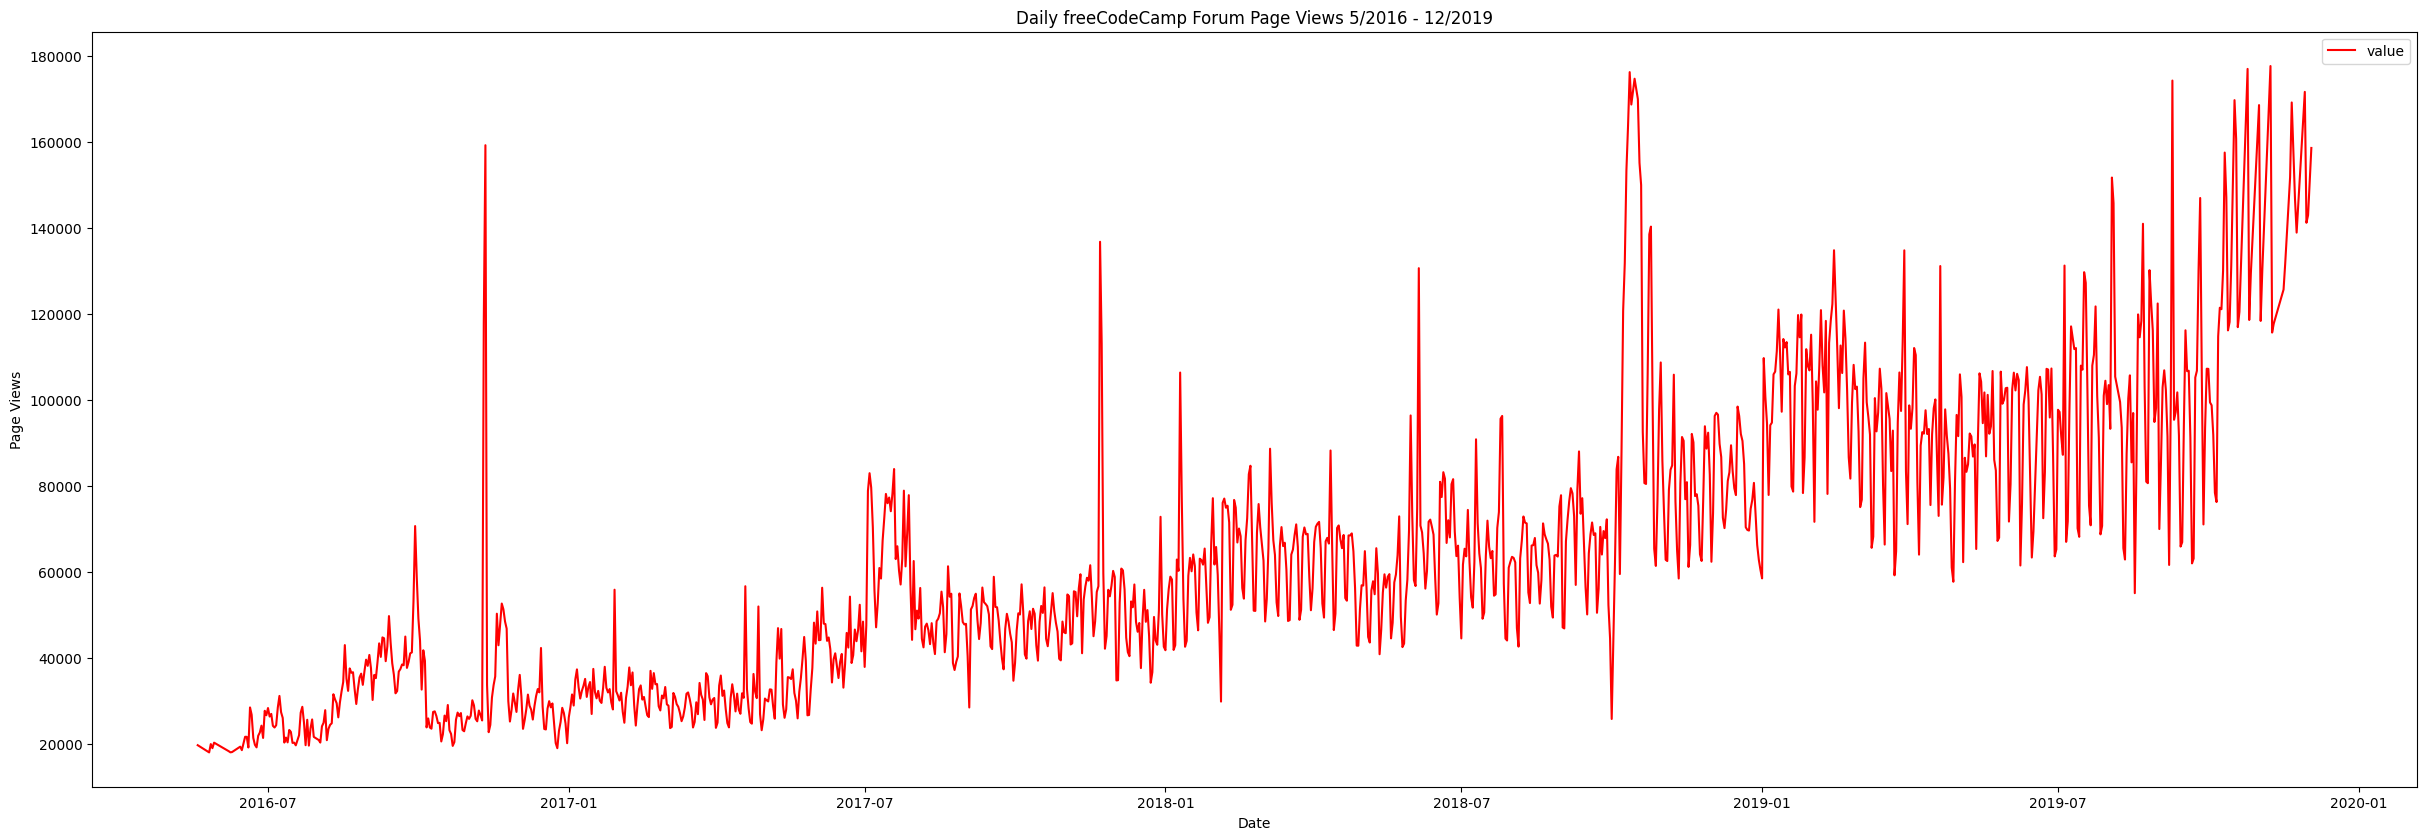

In [ ]:
# Draw Line Plot
fig, ax = plt.subplots(figsize=(30,10),dpi=100)

ax = sns.lineplot(data=df, legend=True, palette=["red"])
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016 - 12/2019")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")

plt.show()

Draw a bar plot. It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

In [ ]:
# Copy and modify data for monthly bar plot
df_bar = df.copy()
df_bar["year"] = df_bar.index.year
df_bar["month"] = df_bar.index.month_name()
df_bar.head()

,value,year,month
date,,,
2016-05-19,19736,2016,May
2016-05-26,18060,2016,May
2016-05-27,19997,2016,May
2016-05-28,19044,2016,May
2016-05-29,20325,2016,May


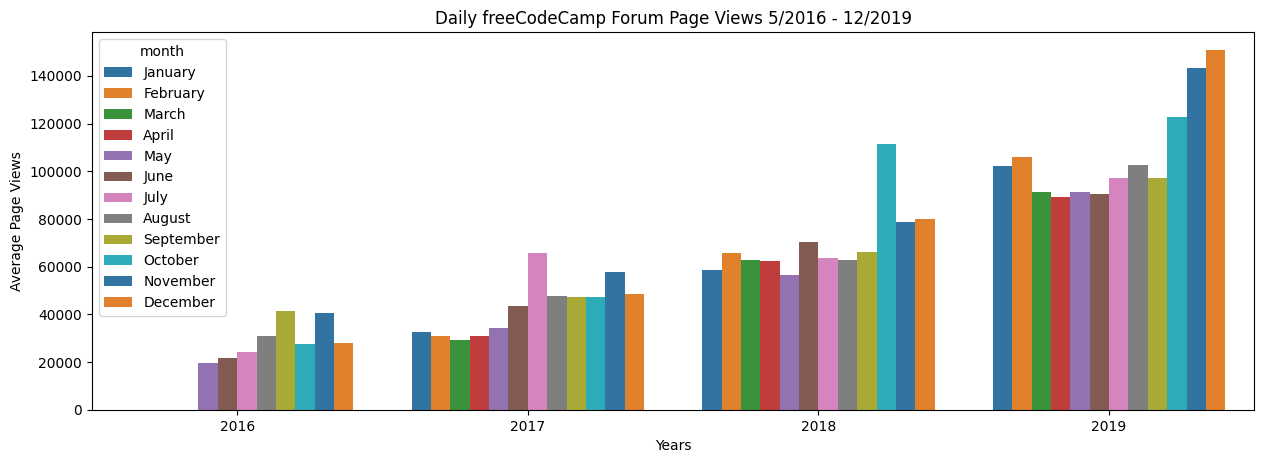

In [ ]:
# Draw Bar Plot
fig, ax = plt.subplots(figsize=(15,5),dpi=100)

ax = sns.barplot(data=df_bar, x="year", y="value", hue="month", hue_order=["January" ,"February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], palette= "tab10", ci=None )
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016 - 12/2019")
ax.set_xlabel("Years")
ax.set_ylabel("Average Page Views")

plt.show()

Draw a Box Plot by using Searborn to draw two adjacent box plots. These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and y axis are labeled correctly.

In [ ]:
# Prepare data for box plots
df_box = df.copy()

df_box["year"] = df_box.index.year
df_box["month"] = df_box.index.strftime("%b")

df_box.head()

,value,year,month
date,,,
2016-05-19,19736,2016,May
2016-05-26,18060,2016,May
2016-05-27,19997,2016,May
2016-05-28,19044,2016,May
2016-05-29,20325,2016,May


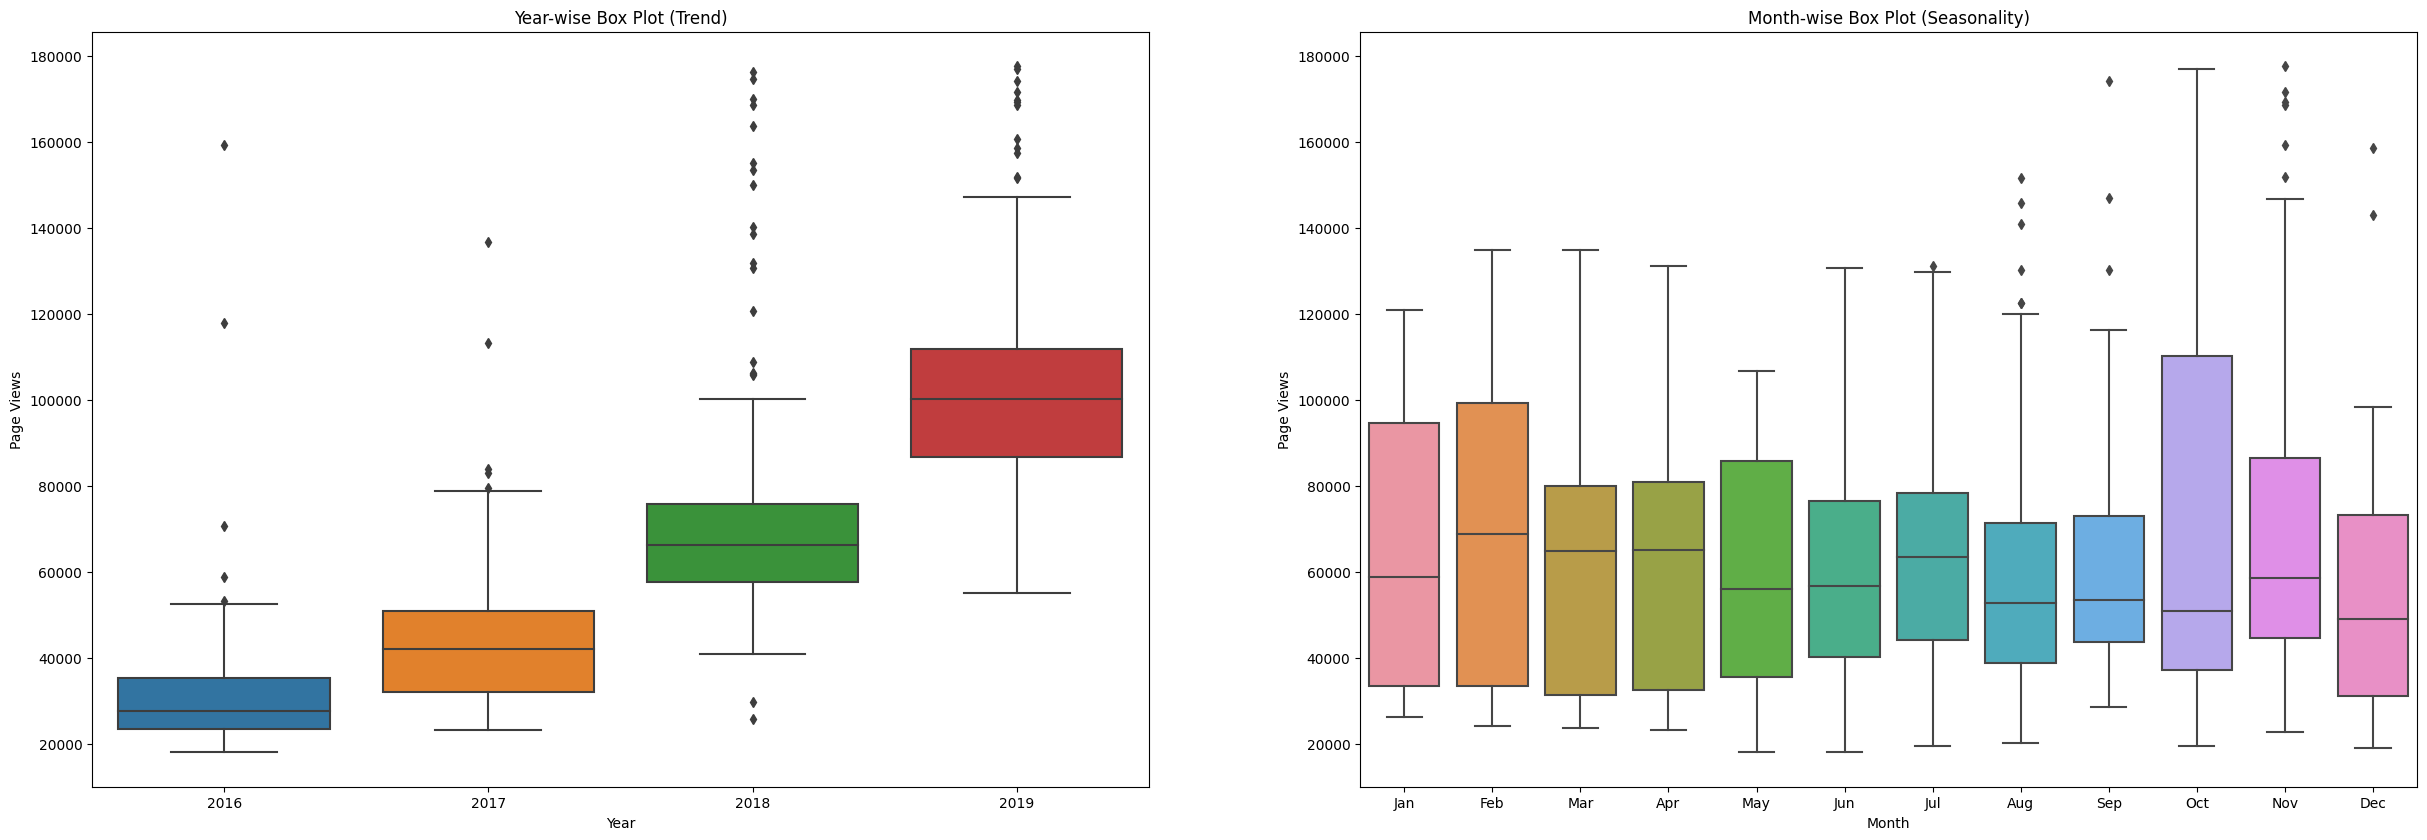

In [ ]:
# Draw box plots (using Seaborn)
fig, ax = plt.subplots(1,2, figsize=(30,10), dpi=100)

# Yearly Boxplot
ax[0] = sns.boxplot(data=df_box, x="year", y="value", ax=ax[0])
ax[0].set_title("Year-wise Box Plot (Trend)")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Page Views")

# Monthly Boxplot
ax[1] = sns.boxplot(data=df_box, x="month", y="value", ax=ax[1], order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug","Sep", "Oct", "Nov", "Dec"])
ax[1].set_title("Month-wise Box Plot (Seasonality)")
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Page Views")

plt.show()